In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-04 21:19:15.738137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/jg/lkqyq8zj1cxg49bgvkxt3l2w0000gn/T/ipykernel_65184/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
training_Set = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testing_Set = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))
train = torch.utils.data.DataLoader(training_Set, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testing_Set, batch_size=50, shuffle=True)

In [3]:
class Shallow_Train_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class Middle_Train_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 60)
        self.fc3 = nn.Linear(60, 38)
        self.fc4 = nn.Linear(38, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val
    
class Deep_Train_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 60)
        self.fc4 = nn.Linear(60, 50)        
        self.fc5 = nn.Linear(50, 30)
        self.fc6 = nn.Linear(30, 10)    
    
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val

In [4]:
shallow_NN = Shallow_Train_NN()
middle_NN = Middle_Train_NN()
deep_NN = Deep_Train_NN()
costFunc = nn.CrossEntropyLoss()
shallowOpt = optim.Adam(shallow_NN.parameters(), lr=0.001)
middleOpt = optim.Adam(middle_NN.parameters(), lr=0.001)
deepOpt = optim.Adam(deep_NN.parameters(), lr=0.001)

In [5]:
EPOCHS = 100
count = 0
countList = []
shallowCostList = []
shallowTestAccuracyList = []
shallowTrainAccuracyList = []
for index in range(EPOCHS):
    countList.append(count)
    count += 1
    print(count)
    for batch in train:
        inputImages, groundTruth = batch
        shallow_NN.zero_grad()
        out1 = shallow_NN(inputImages.view(-1,784))
        cost = costFunc(out1, groundTruth)
        with torch.no_grad():
            c1 = costFunc(out1, groundTruth)
        cost.backward()
        shallowOpt.step()
    shallowCostList.append(c1)
    
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            out1 = shallow_NN(inputImages.view(-1,784))
            for i, output_Tensor in enumerate(out1):
                if torch.argmax(output_Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
    shallowTrainAccuracyList.append(round(correct/total, 3))

    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            out1 = shallow_NN(inputImages.view(-1,784))
            for i, output_Tensor in enumerate(out1):
                if torch.argmax(output_Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
    shallowTestAccuracyList.append(round(correct/total, 3))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [6]:
middleCostList = []
middleTrainAccuracyList = []
middleTestAccuracyList = []
count = 0
for index in range(EPOCHS):
    count += 1
    print(count)
    for batch in train:
        inputImages, groundTruth = batch
        middle_NN.zero_grad()
        out1 = middle_NN(inputImages.view(-1,784))
        cost = costFunc(out1, groundTruth)
        with torch.no_grad():
            c2 = costFunc(out1, groundTruth)
        cost.backward()
        middleOpt.step()
    middleCostList.append(c2)
    
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            out1 = middle_NN(inputImages.view(-1,784))
            for i, output_Tensor in enumerate(out1):
                if torch.argmax(output_Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
    middleTrainAccuracyList.append(round(correct/total, 3))

    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            out1 = middle_NN(inputImages.view(-1,784))
            for i, output_Tensor in enumerate(out1):
                if torch.argmax(output_Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
    middleTestAccuracyList.append(round(correct/total, 3)) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [7]:
deepCostList = []
deepTrainAccuracyList = []
deepTestAccuracyList = []
count = 0
for index in range(EPOCHS):
    count += 1
    print(count)
    for batch in train:
        inputImages, groundTruth = batch
        deep_NN.zero_grad()
        out1 = deep_NN(inputImages.view(-1,784))
        cost = costFunc(out1, groundTruth)
        with torch.no_grad():
            c3 = costFunc(out1, groundTruth)
        cost.backward()
        deepOpt.step()
    deepCostList.append(c3)
    
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            out1 = deep_NN(inputImages.view(-1,784))
            for i, output_Tensor in enumerate(out1):
                if torch.argmax(output_Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
    deepTrainAccuracyList.append(round(correct/total, 3))

    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            out1 = deep_NN(inputImages.view(-1,784))
            for i, output_Tensor in enumerate(out1):
                if torch.argmax(output_Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
    deepTestAccuracyList.append(round(correct/total, 3)) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


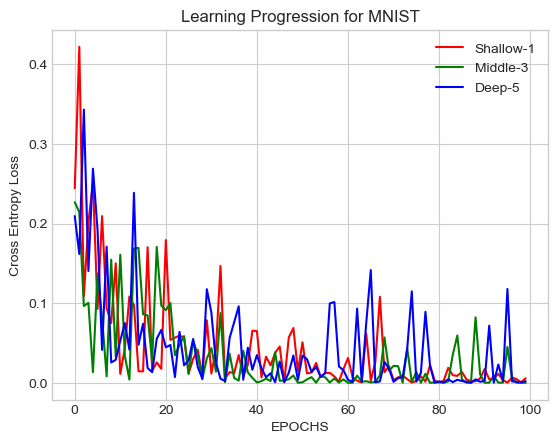

In [8]:
plt.plot(countList, shallowCostList, 'r', label='Shallow-1')
plt.plot(countList, middleCostList, 'g', label='Middle-3')
plt.plot(countList, deepCostList, 'b', label='Deep-5')
plt.title("Learning Progression for MNIST")
plt.xlabel("EPOCHS")
plt.ylabel("Cross Entropy Loss")
plt.legend(loc="upper right")
plt.savefig("MNIST_Cost_SNN_MNN_DNN.jpg")
plt.show()

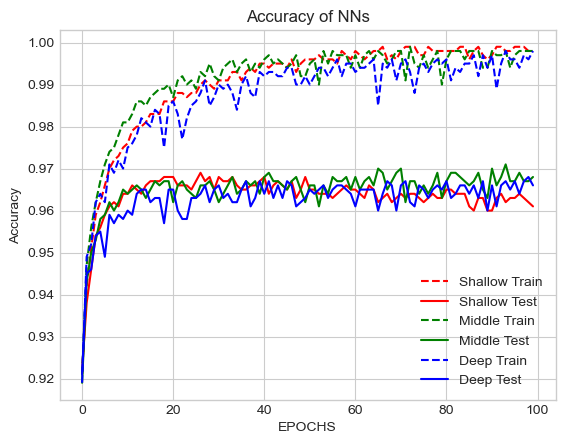

In [9]:
plt.plot(countList, shallowTrainAccuracyList, 'r--', label='Shallow Train')
plt.plot(countList, shallowTestAccuracyList, 'r', label='Shallow Test')
plt.plot(countList, middleTrainAccuracyList, 'g--', label='Middle Train')
plt.plot(countList, middleTestAccuracyList, 'g', label='Middle Test')
plt.plot(countList, deepTrainAccuracyList, 'b--', label='Deep Train')
plt.plot(countList, deepTestAccuracyList, 'b', label='Deep Test')
plt.title("Accuracy of NNs")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.savefig('Accuracy_of_DNN_SNN_MNN.jpg')
plt.show()